In [211]:
#imports for website dev/plotting
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import plotly.express as px

#imports for data + manipulation
import pandas as pd
import numpy as np
import imdb
from bs4 import BeautifulSoup
import requests
import re

#other imports
import os

In [212]:
import plotly
plotly.__version__

'4.3.0'

In [213]:
rachel_df = pd.read_csv('https://raw.githubusercontent.com/ck-duong/dsc106/master/hw4/rachel.csv', index_col = 0)
rachel_df.head()

,original title,genres,runtimes,countries,country codes,votes,year,rating,original air date,kind,plot,id,domestic,international,total
0,Black Widow (2020),"['Action', 'Adventure', 'Sci-Fi']",NaN,['United States'],['us'],NaN,2020.0,NaN,01 May 2020 (USA),movie,A film about Natasha Romanoff in her quests be...,3480822,NaN,NaN,NaN
1,The Favourite (2018),"['Biography', 'Drama', 'History']",119.0,"['Ireland', 'United Kingdom', 'United States']","['ie', 'gb', 'us']",137100.0,2018.0,7.6,21 Dec 2018 (USA),movie,"In early 18th century England, a frail Queen A...",5083738,34366783.0,61551923.0,95918706.0
2,The Mercy (2018),"['Adventure', 'Biography', 'Drama', 'Mystery']",112.0,['United Kingdom'],['gb'],6100.0,2018.0,6.0,30 Nov 2018 (USA),movie,The incredible story of amateur sailor Donald ...,3319730,NaN,NaN,NaN
3,Disobedience (2017),"['Drama', 'Romance']",114.0,"['Ireland', 'United Kingdom', 'United States']","['ie', 'gb', 'us']",20359.0,2017.0,6.6,27 Apr 2018 (USA),movie,A woman returns to her Orthodox Jewish communi...,6108178,3498782.0,4371345.0,7870127.0
4,My Cousin Rachel (2017),"['Drama', 'Mystery', 'Romance']",106.0,"['United Kingdom', 'United States']","['gb', 'us']",16113.0,2017.0,6.0,09 Jun 2017 (USA),movie,A young Englishman plots revenge against his l...,4411596,2716368.0,6483800.0,9200168.0


In [233]:
countries = rachel_df['countries']
countries = countries.str.strip('[]').str.split(',\s+').apply(lambda x: pd.Series(x).value_counts()).sum()
countries = countries.reset_index()
countries['index'] = countries['index'].str.replace("'", "")
countries = countries.rename({'index': 'Country', 0: 'Movie Count'}, axis = 1)

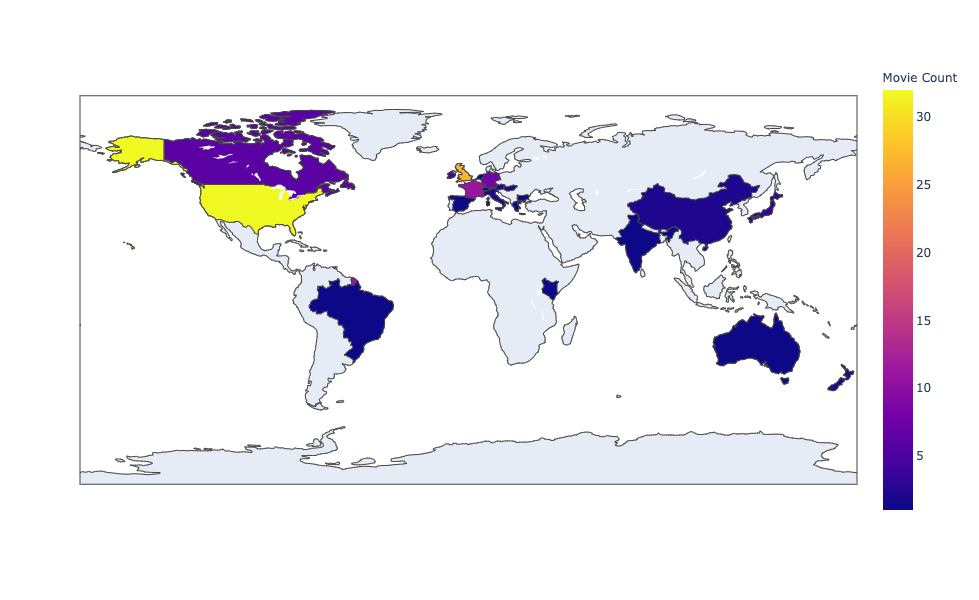

In [235]:
px.choropleth(countries, locations =  'Country', locationmode = 'country names', color = 'Movie Count')

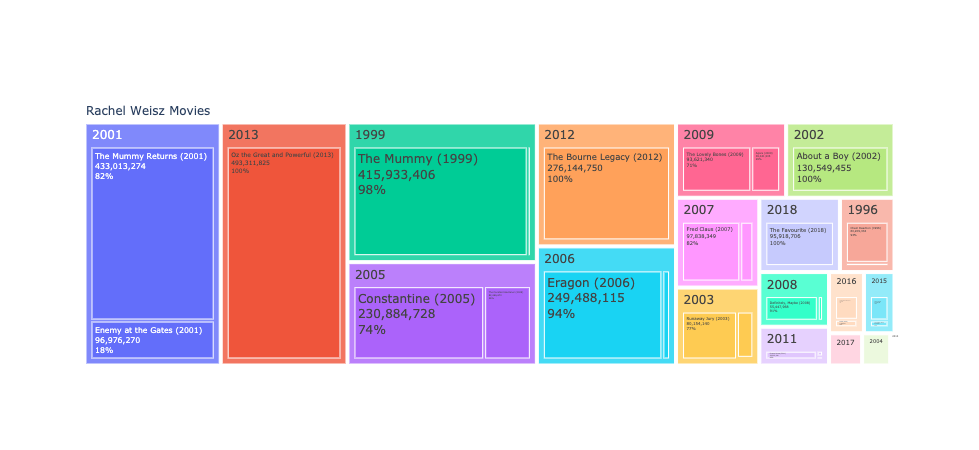

In [91]:
dropped = rachel_df.dropna(subset = ['domestic', 'international'])\
[['original title', 'year', 'domestic', 'international', 'total']]

grouped = dropped.groupby('year')[['domestic', 'international', 'total']].sum().reset_index().sort_values('total')

labels = grouped['year'].tolist()
parents = ['Rachel Weisz Movies' for x in labels]
values = grouped['total'].tolist()

labels.append('Rachel Weisz Movies')
parents.append('')
values.append(grouped['total'].sum())

def divide_gross(row):
    total = row['total']
    title = row['original title']
    parent = row['year']
    
    labels.append(title)
    parents.append(parent)
    values.append(total)

dropped.apply(divide_gross, axis = 1)

fig = go.Figure(go.Treemap(
    labels = labels,
    parents = parents,
    values = values,
    branchvalues = 'total',
    textinfo = "label+value+percent parent",
))

fig.show()

In [103]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
text = rachel_df['plot'].str.cat(sep=' ').lower()
text = text.replace(':', '').replace('-', '').replace(',','').replace('.', '').strip(' ').replace('"', '').replace("'", '')

In [181]:
words = pd.Series(text.split(' ')).value_counts()
words = words.loc[~words.index.isin(stopwords)]
words = words[words.index != '']
words = words.to_frame('count').reset_index().rename({'index': 'word'}, axis = 1)
words['rank'] = words.index + 1
words = words[['rank', 'word', 'count']]

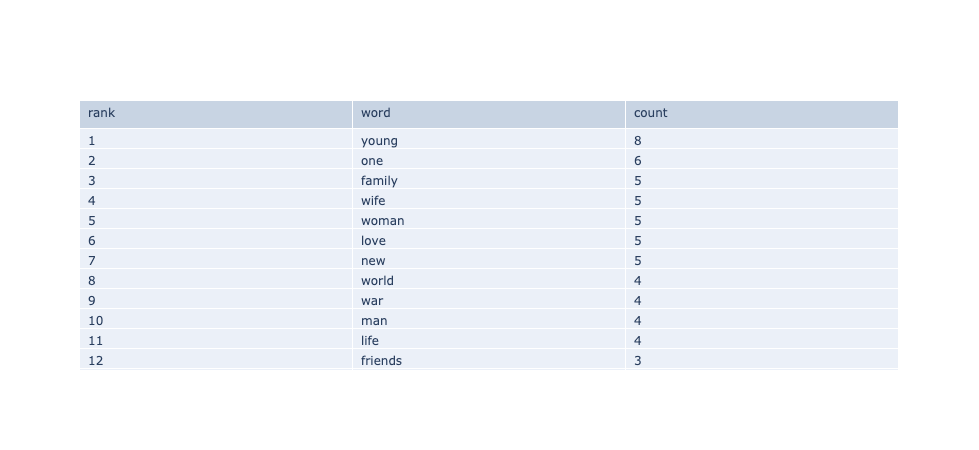

In [183]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(words.columns),
                align='left'),
    cells=dict(values=[words['rank'], words['word'], words['count']],
               align='left'))
])
fig.show()

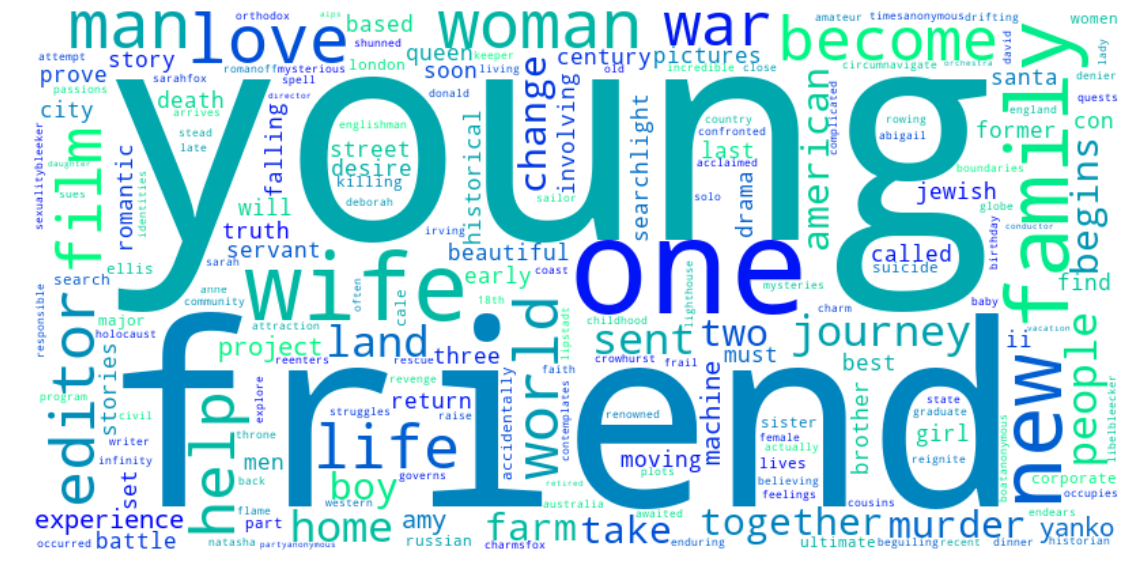

In [237]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Anonymous", 'IMDb', ' '])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white',
                     colormap = 'winter').generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()